In [1]:
# --------------------------
# 1. Import Libraries
# --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from wordcloud import WordCloud

# --------------------------
# 2. Load Dataset
# --------------------------
# Assuming your CSV is named 'spam.csv' and has columns 'v1' and 'v2'
df = pd.read_csv('spammm.csv', encoding='latin-1') 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


C:\Users\Leesha\AppData\Local\Temp\ipykernel_18392\1098391565.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=['skyblue','salmon'])


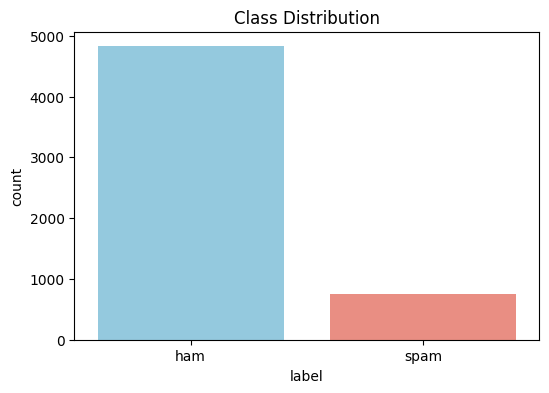

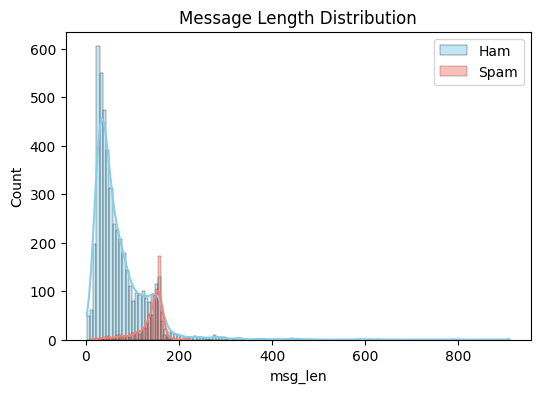

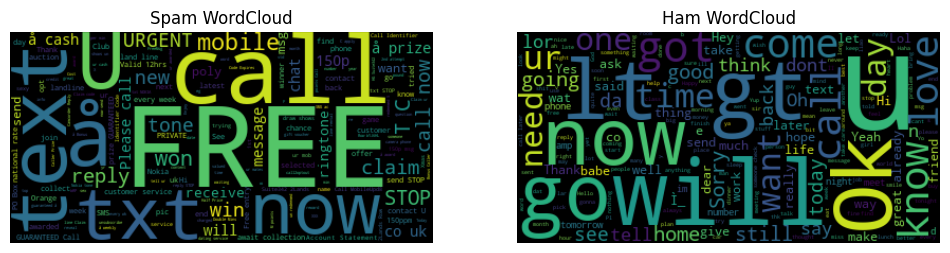

In [2]:
df = df[['v1', 'v2']]  # keep only relevant columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# --------------------------
# 3. Basic Data Visualization
# --------------------------

# 3a. Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette=['skyblue','salmon'])
plt.title('Class Distribution')
plt.show()

# 3b. Message Length Distribution
df['msg_len'] = df['message'].apply(len)
plt.figure(figsize=(6,4))
sns.histplot(df[df['label']=='ham']['msg_len'], color='skyblue', label='Ham', kde=True)
sns.histplot(df[df['label']=='spam']['msg_len'], color='salmon', label='Spam', kde=True)
plt.title('Message Length Distribution')
plt.legend()
plt.show()

# 3c. WordCloud for Spam and Ham
spam_text = ' '.join(df[df['label']=='spam']['message'])
ham_text = ' '.join(df[df['label']=='ham']['message'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
WordCloud(width=500, height=500, background_color='white').generate(spam_text)
plt.imshow(WordCloud().generate(spam_text), interpolation='bilinear')
plt.axis('off')
plt.title('Spam WordCloud')
print("\n")
plt.subplot(1,2,2)
WordCloud(width=500, height=500, background_color='white').generate(ham_text)
plt.imshow(WordCloud().generate(ham_text), interpolation='bilinear')
plt.axis('off')
plt.title('Ham WordCloud')
plt.show()


Naive Bayes Accuracy: 96.86%




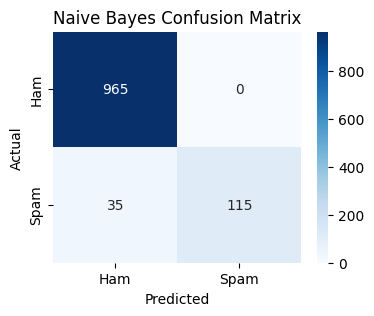

Logistic Regression Accuracy: 94.44%




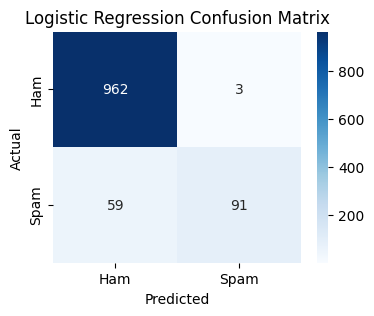

SVM Accuracy: 97.49%




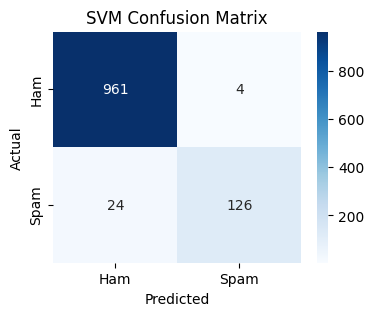

In [6]:
# --------------------------
# 4. Preprocessing & TF-IDF
# --------------------------
X = df['message']
y = df['label_num']

tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# --------------------------
# 5. Train & Evaluate Models
# --------------------------
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc*100:.2f}%")
    print("\n")
    
    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [5]:
# --------------------------
# 6. Test on New Messages
# --------------------------
new_messages = [
    "Congratulations! You have won a $1000 Walmart gift card. Go to http://bit.ly/123456 to claim now.",
    "Hey, are we still meeting for lunch today?"
]

new_tfidf = tfidf.transform(new_messages)

for name, model in models.items():
    preds = model.predict(new_tfidf)
    print(f"\n{name} Predictions:")
    for msg, pred in zip(new_messages, preds):
        label = 'Spam' if pred==1 else 'Ham'
        print(f"Message: {msg}\nPrediction: {label}\n")



Naive Bayes Predictions:
Message: Congratulations! You have won a $1000 Walmart gift card. Go to http://bit.ly/123456 to claim now.
Prediction: Spam

Message: Hey, are we still meeting for lunch today?
Prediction: Ham


Logistic Regression Predictions:
Message: Congratulations! You have won a $1000 Walmart gift card. Go to http://bit.ly/123456 to claim now.
Prediction: Spam

Message: Hey, are we still meeting for lunch today?
Prediction: Ham


SVM Predictions:
Message: Congratulations! You have won a $1000 Walmart gift card. Go to http://bit.ly/123456 to claim now.
Prediction: Spam

Message: Hey, are we still meeting for lunch today?
Prediction: Ham

